In [36]:
import shutil
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tempfile import NamedTemporaryFile
from ArabicOcr import arabicocr

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 112, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#extract words and make an image file
def extract_words(inImageName, outImageName):
    results = arabicocr.arabic_ocr(inImageName,outImageName)
    return results

#get resurlts into text file
def resultsToText(results, fileName="results.txt"):
    words=[]
    for i in range(len(results)):	
        word=results[i][1]
        words.append(word)
    with open (fileName,'w',encoding='utf-8')as myfile:
    		myfile.write(str(words))

#read image path and create a temporary file
def getTemporaryImage(input_image_path):
    tempFile = NamedTemporaryFile(mode="w",prefix="idImageTemp",suffix='.jpg', delete=False, dir="C:\\Users\\Hilati\\Desktop\\Projects\\Stage GCT\\")
    shutil.copy2(input_image_path, tempFile.name)
    return tempFile


input_image_path = "imtestIDPS2.png"
tempFile = getTemporaryImage(input_image_path)
img = cv2.imread(tempFile.name)

#image pre-processing
'''
unoised = remove_noise(img)
opened = opening(img)
eroded = erode(opened)
dilated = dilate(eroded)
gray = get_grayscale(dilated)
thresh = thresholding(gray)

out_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
cv2.imwrite(tempFile.name, gray)
'''


out_image='out.jpg'
results = extract_words(tempFile.name, out_image)
print(results)

#resultsToText(results, fileName="results.txt")


tempFile.close()
os.unlink(tempFile.name)

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.6300: 13491182
[INFO] 0.6998: الحيلاتى
[INFO] 0.6326: أشرف
[INFO] 0.9948: العياشى
[INFO] 0.7391: بن كمال بن
[INFO] 0.9999: 1999
[INFO] 0.9960: س
[INFO] 0.9997: 08
[INFO] 1.0000: تونس
[INFO] 0.9963: مار
[[[[396, 58], [1210, 58], [1210, 232], [396, 232]], '13491182', 0.6299546673563834], [[[1134, 305], [1850, 305], [1850, 554], [1134, 554]], 'الحيلاتى', 0.699754781772254], [[[1520, 526], [1937, 526], [1937, 736], [1520, 736]], 'أشرف', 0.6325574906840259], [[[787, 713], [1366, 713], [1366, 934], [787, 934]], 'العياشى', 0.994809057662463], [[[1408, 744], [2208, 744], [2208, 920], [1408, 920]], 'بن كمال بن', 0.7391233132890035], [[[617, 907], [976, 907], [976, 1080], [617, 1080]], '1999', 0.9998744130134583], [[[1026, 965], [1241, 965], [1241, 1110], [1026, 1110]], 'س', 0.9960166623479836], [[[1473, 927], [1659, 927], [1659, 1065], [1473, 1065]], '08', 0.999665370423834], [[[1525, 1112], [1970, 1112], [1970, 1305], [1525, 1305]], 'تونس', 0.999971807003

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] 0.6300: 13491182
[INFO] 0.6998: الحيلاتى
[INFO] 0.6326: أشرف
[INFO] 0.9948: العياشى
[INFO] 0.7391: بن كمال بن
[INFO] 0.9999: 1999
[INFO] 0.9960: س
[INFO] 0.9997: 08
[INFO] 1.0000: تونس
[INFO] 0.9963: مار


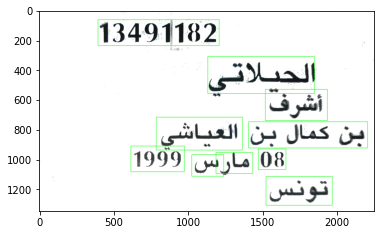

In [37]:
import easyocr
import cv2

# img = cv2.imread("imtestID.jpg")
img = cv2.imread("imtestIDPS2.png")
reader = easyocr.Reader(['ar','en'])

result = reader.readtext(img)
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# with the OCR'd text itself
	cv2.rectangle(img, tl, br, (0, 255, 0), 2)

# show the output image
plt.imshow(img)